# N-Queens Problem

### Definitions and functions

In [ ]:
# Imports
import random
import math
import matplotlib.pyplot as plt
import copy

In [ ]:
# Function to create an Empty Board
def emptyChessBoard():
    return [0] * chessBoardSize * chessBoardSize

In [ ]:
# Function to create a Full Random Chess Board
def fullRandomChessBoard():
    randChessBoard = emptyChessBoard()
    for x in range(chessBoardSize):
        while True:
            randPosition = random.randrange(chessBoardSize*chessBoardSize)
            if randChessBoard[randPosition] == 0:
                randChessBoard[randPosition] = 1
                break            
    return randChessBoard

In [ ]:
# Function to print the Board
def printChessBoard(chessBoard):
    boardSize = int(math.sqrt(len(chessBoard)))
    boardElement = 0
    for x in chessBoard:
        printBoard = lambda i: '|_|' if str(i) == '0' else '|X|'
        boardElement += 1
        if boardElement % boardSize == 0:
            print("%s" %(printBoard(x)))
        else:
            print("%s" %(printBoard(x)), end = '')

In [ ]:
# Count constraints violations
def countConstraintSatisfactory(chessBoard):
    violations = 0
    for myIndex, myValue in enumerate(chessBoard):
        if myValue == 1: # Queen found
            for myPairIndex, myPairValue in enumerate(chessBoard):
                if myPairValue == 1 and myPairIndex != myIndex: # Queen check
                    #print('Debug: Check ' + str(myIndex) + ' vs ' + str(myPairIndex))
                    if isConstraintSatisfactoryLocal(chessBoard, myIndex, myPairIndex) is False:
                        violations = violations + 1
    if violations > 0:
        violations = violations / 2
    return violations

In [ ]:
# Function to check constraints between x and y
def isConstraintSatisfactoryLocal(chessBoard, x, y):
    boardSize = int(math.sqrt(len(chessBoard)))
    xRow = int (x/boardSize)
    xColumn = int (x%boardSize)
    yRow = int (y/boardSize)
    yColumn = int (y%boardSize)
    #print('Debug: Check ' + str(x) + ' ('+str(xRow)+','+str(xColumn)+')  vs ' + str(y) + ' ('+str(yRow)+','+str(yColumn)+')')
    if xRow == yRow:
        return False
    if xColumn == yColumn:
        return False
    inBoard = lambda e: boardSize if e > boardSize else 0 if e < 0 else e
    
    for colisionNumber in list(range(-1*boardSize,boardSize)):
        if xRow == yRow + colisionNumber and xColumn == yColumn + colisionNumber:
            #print('Debug: Colided!')
            return False
        if xRow == yRow - colisionNumber and xColumn == yColumn + colisionNumber:
            #print('Debug: Colided!')
            return False
    
    return True    

In [ ]:
# Function that returns the fitness of a chessboard based on the number of violations
def fitness(chessBoard):
    return countConstraintSatisfactory(chessBoard)

In [ ]:
# Sort population
def sortPopulation(population):
    population.sort(key=lambda x: fitness(x))
    return population

In [ ]:
# Tournament selection
def tournament(population, k):
    candidate1 = copy.deepcopy(population[random.randrange(len(population))])
    for i in range(k):
        while True:
            candidate2 = copy.deepcopy(population[random.randrange(len(population))])
            if candidate1 != candidate2:
                break
    if fitness(candidate2) < fitness(candidate1):
        return candidate2
    else:
        return candidate1

In [ ]:
# Crossover
def crossover(parent1, parent2):
    cut1 = random.randrange(len(parent1))
    cut2 = random.randrange(len(parent1))
    if cut1 == cut2:
        return parent1, parent2
    if cut1 > cut2:
        cuttmp = cut1
        cut1 = cut2
        cut2 = cuttmp
    #print('%i - %i' %(cut1, cut2))
    child1 = parent1[0:cut1]+parent2[cut1:cut2]+parent1[cut2:]
    child2 = parent2[0:cut1]+parent1[cut1:cut2]+parent2[cut2:]
    return child1, child2

In [ ]:
# Mutation flip position
def mutateFlipPosition(individual):
    flipsCount = random.randrange(maxNumberOfRandFlips)
    if flipsCount == 0:
        flipsCount = 1
    for flips in range(flipsCount):
        while True:
            randFlip = random.randrange(len(individual))
            if individual[randFlip] == 0:
                individual[randFlip] = 1
                break
        while True:
            randFlip = random.randrange(len(individual))
            if individual[randFlip] == 1:
                individual[randFlip] = 0
                break

In [ ]:
# Fix chess board queens count
def fixChessBoard(individual):
    while individual.count(1) > chessBoardSize:
        randFlip = random.randrange(len(individual))
        if individual[randFlip] == 1:
            individual[randFlip] = 0

    while individual.count(1) < chessBoardSize:
        randFlip = random.randrange(len(individual))
        if individual[randFlip] == 0:
            individual[randFlip] = 1

In [ ]:
# Definitions
chessBoardSize = 8 # Board size
maxRandomQueens = 8 # Just for random gereration, does not limit the algorithm
halfPopulationSize = 50 # Half population of a generation
tournamentRounds = 1 # Rounds of tournament selection
chanceToMutate = 0.9 # Probability to mutate
maxNumberOfRandFlips = 2 # How many positions can be fliped
generations = 500 # How many generations

### Main program

In [ ]:
# Generate initial random population
# Phenotype representation as a List
population = []
for individual in list(range(halfPopulationSize)):
    randChessBoard = fullRandomChessBoard()
    population.append(randChessBoard)

In [ ]:
# Main generations loop
genFitnessLog = []
random.seed()

for gen in range(generations):

    # Next generation
    newPopulation = []
    
    # Crossover population until it reaches full size
    while len(newPopulation) < halfPopulationSize * 2:
        parent1 = tournament(population, tournamentRounds)
        parent2 = tournament(population, tournamentRounds)
        child1, child2 = crossover(parent1, parent2)
        fixChessBoard(child1)
        fixChessBoard(child2)
        newPopulation.append(child1)
        newPopulation.append(child2)
        newPopulation.append(parent1)
        newPopulation.append(parent2)

    # Mutate some individuals (not the first)
    for i in range(len(newPopulation)):
        if random.random() <= chanceToMutate:
            mutateFlipPosition(newPopulation[i])

    # Sort population according to fitness
    newPopulation = sortPopulation(newPopulation)
    
    # Print generation fitness
    genFitness = fitness(newPopulation[0])
    genFitnessLog.append(fitness(newPopulation[0]))
    #print('Gen %i fitness 0=%i size %i' %(gen, genFitness, len(newPopulation)))
    
    # Next generation
    population = []
    
    for i in range(halfPopulationSize):
        population.append(newPopulation[i])

    if genFitness == 0:
        break
        

### Results

Found a chessboard with fitness 0 (With 0 Constraint Violations). It runned for 73 generations.
---
|_||_||_||_||_||X||_||_|
|_||_||X||_||_||_||_||_|
|_||_||_||_||X||_||_||_|
|_||_||_||_||_||_||_||X|
|X||_||_||_||_||_||_||_|
|_||_||_||X||_||_||_||_|
|_||X||_||_||_||_||_||_|
|_||_||_||_||_||_||X||_|
---


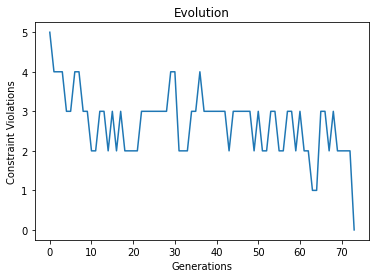

In [ ]:
# Show results
print('Found a chessboard with fitness %i (With %i Constraint Violations). It runned for %i generations.' %(fitness(population[0]), fitness(population[0]), len(genFitnessLog)-1))
print('---')
printChessBoard(population[0])
print('---')

# Plot evolution
plt.plot(genFitnessLog)
plt.title('Evolution')
plt.ylabel('Constraint Violations')
plt.xlabel('Generations')

plt.show()